<center>

# Aviation Safety Data Analysis #
    
</center>

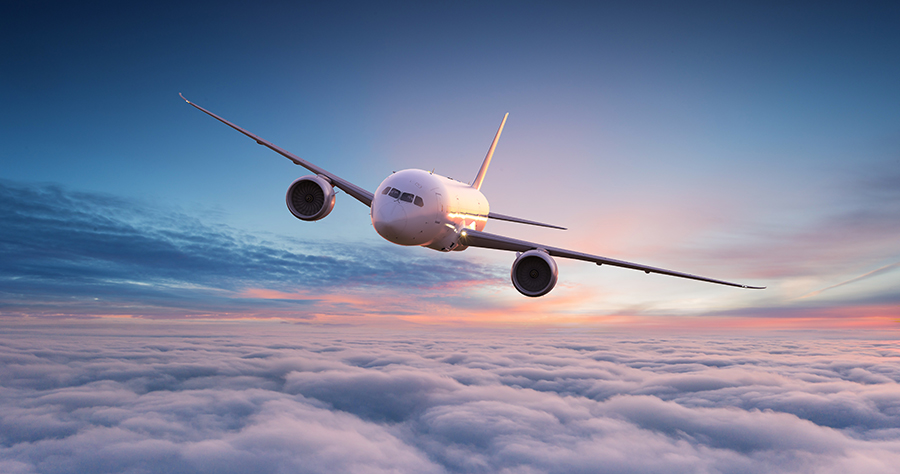

## Overview ##

- Task

Your company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Bottom Line ##

We will be looking for the safest personal aircraft with a popular reputation as well as a "home base" for the start of the company. Find a national location that is safe while having a high demand for personal aircraft.

In [134]:
#Read in data
import pandas as pd
df = pd.read_csv('data/AviationData.csv', encoding = 'ISO-8859-1',low_memory=False)

## Data Understanding ##

This project uses data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents within the United States. With that, we can make a national analysis of the most common makes of personal aircraft within the 21st century, then discover which can be the safest for the consumer. 
Filtering through the data and finding a location associated to a history of minimal accidents. Some outside research maybe necessary.

In [135]:
#Getting a first look at what we will be working with
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [136]:
#Way better look into our data
#31 columns, 88889 rows, event date is an object, decent amount of null data from 8 out of 30 columns but still
#lots of information to work with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Analysis ##

Before cleaning the data, start by creating a copy in case of error to keep the original secure.

In [137]:
df_copy = df

We'll start to filter the data by the first main components of our analysis.
- Date: Being within the last 10 years.
- Country: Our business is remaining national. 
- Location: We want to find the best state to have our base airport.
- Type of aircraft: We are working with airplanes.
- Type of flight: Sticking with personal flights.
- Investigation type: We are looking for accidents.


In [138]:
#Converting the Event.Date column into date and time and filtering by just the year and within 2012, then converting
#into an interger to be able to graph with.
#Filtering by only United States, Airplane, Personal and Accidents.

df_copy["Event.Date"] = pd.to_datetime(df_copy["Event.Date"]).dt.year
df_copy["Event.Date"] = df_copy["Event.Date"].astype(int)

df_copy = df_copy[df_copy["Event.Date"] >= 2012]
df_copy = df_copy[df_copy["Country"] == "United States"]
df_copy = df_copy[df_copy["Aircraft.Category"] == "Airplane"]
df_copy = df_copy[df_copy["Purpose.of.flight"] == "Personal"]
df_copy = df_copy[df_copy["Investigation.Type"] == "Accident"]

df_copy.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
71225,20120102X93914,Accident,ERA12LA131,2012,"Willimantic, CT",United States,414430N,0721123W,IJD,Windham Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020
71227,20111230X02532,Accident,WPR12CA073,2012,"Eureka, CA",United States,404812N,0124646W,EKA,Murray Field Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020
71228,20120103X35104,Accident,ERA12CA134,2012,"River Ranch, FL",United States,027543N,0813448W,2RR,River Ranch,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020
71229,20120103X94513,Accident,ERA12LA132,2012,"Shelter Island, NY",United States,004140N,0722035W,NaN,Klenawicus Airfield,...,Personal,NORTHEASTERN AVIATION CORP,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020
71231,20120104X41711,Accident,CEN12CA121,2012,"Truth or Consequences, NM",United States,331413N,1071618W,TCS,Truth or Consequences Municipa,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not maintain airplane control du...,25-09-2020


## Location ##

- We want to stick nationally but let's refine that to state.

In [139]:
#I want to refine my location even more by just seeing the state and removing the city.
df_copy["State"] = df["Location"].str.split(",").str[-1].str.strip()
df_copy["State"].value_counts().head()

CA    784
TX    649
FL    580
AK    579
AZ    295
Name: State, dtype: int64

## Injuries ##

Knowing we want to see the risks of these aircrafts we will start to filter by injuries and fatalities.

- There is another column ("Injury.Serverity") with the same information. We'll check to see if different or duplicate.
- See how much data is missing from each column.
- Decide how to handle missing data.

In [140]:
#Creating a dataset with just the selected columns Injury.Serverity, Total.Serious.Injuries. Total.Minor.Injuries
#Total.Uninjured so compare the values.
df_check = df_copy[["Injury.Severity", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries","Total.Uninjured"]]
df_check.head(20)

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
71225,Non-Fatal,0.0,0.0,0.0,1.0
71227,Non-Fatal,0.0,0.0,0.0,1.0
71228,Non-Fatal,0.0,0.0,0.0,3.0
71229,Non-Fatal,0.0,0.0,0.0,1.0
71231,Non-Fatal,0.0,0.0,0.0,1.0
71234,Non-Fatal,0.0,0.0,0.0,1.0
71235,Non-Fatal,0.0,0.0,0.0,1.0
71236,Non-Fatal,0.0,0.0,0.0,1.0
71239,Non-Fatal,0.0,0.0,0.0,1.0
71240,Non-Fatal,0.0,2.0,0.0,0.0


- Okay great, it appears this is a duplicate of information.
So we can drop this column.

In [141]:
#Dropping Injury.Severity
df_copy.drop("Injury.Severity", axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 71225 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                8264 non-null   object 
 1   Investigation.Type      8264 non-null   object 
 2   Accident.Number         8264 non-null   object 
 3   Event.Date              8264 non-null   int64  
 4   Location                8264 non-null   object 
 5   Country                 8264 non-null   object 
 6   Latitude                8260 non-null   object 
 7   Longitude               8260 non-null   object 
 8   Airport.Code            6129 non-null   object 
 9   Airport.Name            6068 non-null   object 
 10  Aircraft.damage         8250 non-null   object 
 11  Aircraft.Category       8264 non-null   object 
 12  Registration.Number     8264 non-null   object 
 13  Make                    8263 non-null   object 
 14  Model                   8263 non-nu

- While we are in the midst of dropping unnecessary columns, let's drop everything else not of relevance.


In [142]:
#Creating a list of the columns we want to drop for simpler code then dropping that list.
columns = df_copy.columns[[0, 2, 4, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 21, 26, 27, 28, 29]]
drop_columns = columns.tolist()
df_copy = df_copy.drop(drop_columns, axis=1)

- I also want to change the names for some of the columns to make them more clear based off our analysis.

In [143]:
#Simplifying these column names for easier coding
df_copy = df_copy.rename(columns = {"Total.Fatal.Injuries": "Fatal.Injuries", "Total.Serious.Injuries": "Serious.Injuries", "Total.Minor.Injuries": "Minor.Injuries", "Total.Uninjured": "Uninjured", "Investigation.Type": "Accidents", "Event.Date": "Date"})

In [144]:
#Looking at our data now that we've filtered and cleaned our columns.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 71225 to 88886
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accidents          8264 non-null   object 
 1   Date               8264 non-null   int64  
 2   Country            8264 non-null   object 
 3   Aircraft.Category  8264 non-null   object 
 4   Make               8263 non-null   object 
 5   Model              8263 non-null   object 
 6   Purpose.of.flight  8264 non-null   object 
 7   Fatal.Injuries     8264 non-null   float64
 8   Serious.Injuries   8264 non-null   float64
 9   Minor.Injuries     8264 non-null   float64
 10  Uninjured          8264 non-null   float64
 11  State              8264 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 839.3+ KB


- Now we only have two columns with 1 null value. It won't impact our data if we drop them.

In [145]:
#Dropping the rows with null values
df_copy = df_copy.dropna(subset=["Make", "Model"])

- After cleaning up all the columns, we'll reset the index.

In [146]:
df_copy = df_copy.reset_index(drop=True)
df_copy.head()

,Accidents,Date,Country,Aircraft.Category,Make,Model,Purpose.of.flight,Fatal.Injuries,Serious.Injuries,Minor.Injuries,Uninjured,State
0,Accident,2012,United States,Airplane,HANEY JOHN F B,SEASTAR XP,Personal,0.0,0.0,0.0,1.0,CT
1,Accident,2012,United States,Airplane,MCADAM W E,CHRISTEN EAGLE II,Personal,0.0,0.0,0.0,1.0,CA
2,Accident,2012,United States,Airplane,MAULE,M-5-180C,Personal,0.0,0.0,0.0,3.0,FL
3,Accident,2012,United States,Airplane,PIPER,PA-34-200T,Personal,0.0,0.0,0.0,1.0,NY
4,Accident,2012,United States,Airplane,BUTLER JOHN R,SX 300,Personal,0.0,0.0,0.0,1.0,NM


## Make ##

- Taking a peek into the "Make" column,  we can see there is a good amount of duplicate information.

In [147]:
df_copy["Make"].value_counts().head(50)

CESSNA                            1810
PIPER                             1195
Cessna                             456
BEECH                              422
Piper                              314
MOONEY                             141
Beech                              125
CIRRUS DESIGN CORP                 107
BELLANCA                            95
MAULE                               83
AERONCA                             80
Vans                                62
LUSCOMBE                            58
STINSON                             57
CHAMPION                            53
BOEING                              50
AVIAT AIRCRAFT INC                  43
NORTH AMERICAN                      40
Cirrus                              38
VANS                                38
Mooney                              33
Champion                            32
GRUMMAN AMERICAN AVN. CORP.         29
ZENITH                              28
TAYLORCRAFT                         28
AMERICAN CHAMPION AIRCRAF

- We'll clean this up by consolidating.

In [148]:
df_copy["Make"].replace(to_replace = ["CESSNA", "Cessna", "CESSNA AIRCRAFT CO", "CESSNA Aircraft", "CESSNA AIRCRAFT", "Cessna Aircraft Co.", "Cessna Aircraft Company"], value = "Cessna", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["PIPER", "Piper", "PIPER AIRCRAFT INC", "New Piper", "NEW PIPER", "NEW PIPER AIRCRAFT INC", "New Piper Aircraft, Inc."], value = "Piper", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["BEECH", "Beech", "BEECH AIRCRAFT", "BEECH AIRCRAFT CO.", "Beech Aircraft Corp", "Beech Aircraft Corporation", "BEECH AIRCRAFT CORPORATION"], value = "Beechcraft", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["MOONEY", "Mooney", "MOONEY AIRCRAFT CORP."], value = "Mooney", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["CIRRUS DESIGN CORP", "Cirrus", "Cirrus Design Corp.", "CIRRUS"], value = "Cirrus", inplace = True, regex = False)
df_copy["Make"].replace(to_replace = ["MAULE", "Maule"], value = "Malue", inplace = True, regex = False)

## Model ##

- Reviewing our makes and models with the least accidents associated to injuries.

In [150]:
df_copy[["Make", "Model"]].value_counts().tail(60)

Make                          Model            
NORTHROP                      N9M                  1
NORTH WING UUM INC            SPORT X2 912         1
NORTH WING                    APACHE               1
NORTH AMERICAN/AERO CLASSICS  P 51                 1
NORTH AMERICAN-MEDORE         SNJ-4                1
NORTH AMERICAN                T28                  1
                              T-28A                1
                              P 51                 1
                              T 6                  1
                              T 28C                1
                              T 28A                1
                              SNJ-6                1
                              SNJ-4                1
                              SNJ 6                1
                              SNJ 5                1
                              P 51D                1
NBB INC                       GLASAIR III          1
NAVION                        NAVION H             

## Data Analysis ##

Now that our data is cleaned up we can start our anaylsis.

- First, looking at the top 5 locations with the highest amount of accidents.

- Then, looking into how severe the injuries are in those accidents.


- Finally, looking at what make of airplane has the least amount of injuries.

In [151]:
import matplotlib.pyplot as plt
from datetime import datetime

### Top 5 states with highest amount of accidents ###

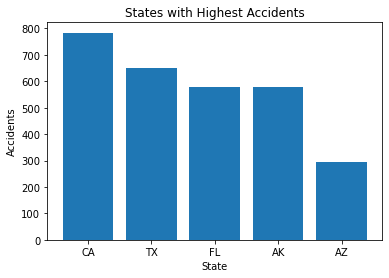

In [152]:
#Charting the top 5 states and the total amount of accidents by count since it is an object.

state_accidents = df_copy.groupby("State")["Accidents"].count()

sorted_states = state_accidents.sort_values(ascending = False)

top_5 = sorted_states.head(5)


plt.bar(top_5.index, top_5.values)

plt.xlabel("State")
plt.ylabel("Accidents")
plt.title("States with Highest Accidents")

plt.show()

### Severity of injuries from accidents ###

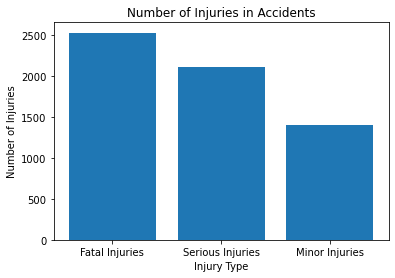

In [121]:
#Charting the sum of columns; Fatal, Serious and Minor injuries compared to the total amount of injuries.


injuries = df_copy[["Fatal.Injuries", "Serious.Injuries", "Minor.Injuries"]].sum()

labels = ["Fatal Injuries", "Serious Injuries", "Minor Injuries"]
values = injuries.values

plt.bar(labels, values) 
plt.xlabel("Injury Type")
plt.ylabel("Number of Injuries")
plt.title("Number of Injuries in Accidents")
plt.show()

### Aircraft makes with most injuries ###

- Top 5 airplane makes
- With this data we are excluding uninjured passengers.

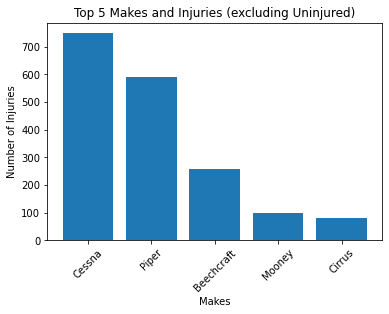

In [122]:
#Charting itop 5 airplane makes with most injuries.
filtered_df = df_copy[df_copy['Uninjured'] == 0] 
top_makes = filtered_df['Make'].value_counts().head(5)

plt.bar(top_makes.index, top_makes.values)
plt.xlabel('Makes')
plt.ylabel('Number of Injuries')
plt.title('Top 5 Makes and Injuries (excluding Uninjured)')
plt.xticks(rotation=45)
plt.show()

## Evaluation ##

- From our graphs we can see the top 5 states with the most accidents are CA, TX, FL, AK, AZ.
- Unfortunately the most common injuries from accidents are fatal.
- Then graphing the top 5 airplane makes with the most injuries we see Mooney and Cirrus are considerably lower.

## Recommendation - Saftey, Popularity  and Cost ##

Outside research shows that although Alaska is one of the states with higher injuries attributed to accidents it also is one of the states with the most private airstrips and personal hours flown. Private aircrafts is one of the most common ways of travel in Alaska. 

After cleaning and filtering our data we see that Mooney and Cirrus are some of the safer private aircrafts. Outside research shows that Mooney is more cost effective than Cirrus by 20% and Mooney has been in the aviation business for almost 100 years.

From the results of our data and outside research we believe the best recommondation based on safety, popularity and cost is


 # <center> <u>Alaska Home Base #
    

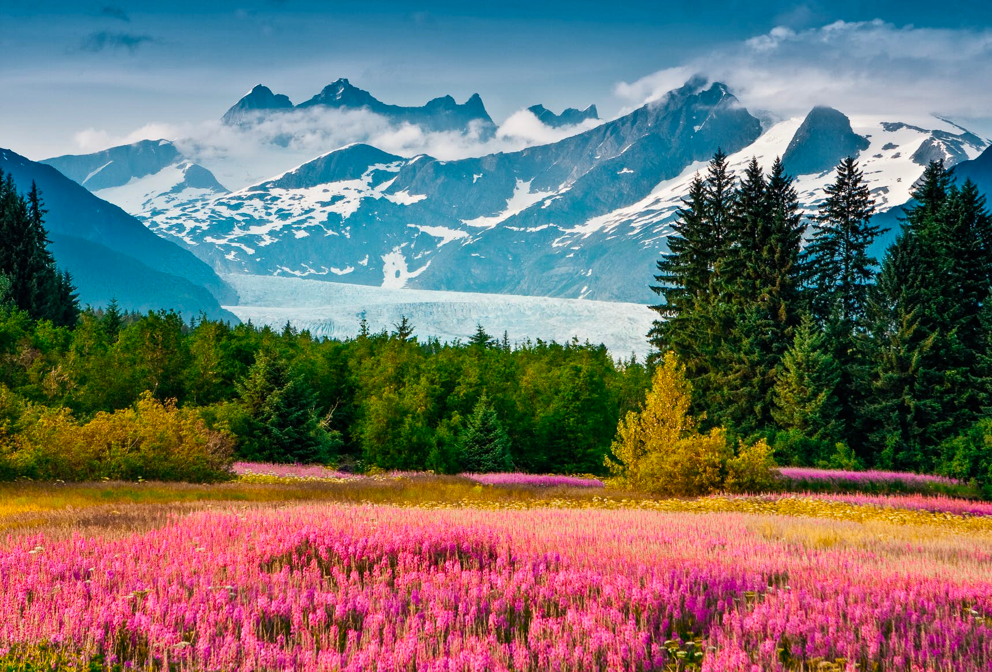

<center>
    
 # <u> Mooney M20 # 
    
    
<center/>

![ALT TEXT](https://flyer.co.uk/wp-content/uploads/2016/02/Mooney-2016-Acclaim-Ultra-2.jpg)

In [403]:
#saved filtered data file
df_copy.to_csv("data_filtered.csv")